In [128]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#import os
#os.getcwd()

In [129]:
sp_raw = pd.read_csv("C:\\Users\\SUKHJIT\\Downloads\\AMS325-RawProjectData\\SPX.csv", parse_dates=['Date'])
#parsed the date column into date format
print(sp_raw)

sp_proc = sp_raw.drop(columns=['Open','High','Low','Adj Close','Volume'])
sp_proc["Percent Change"] = sp_proc['Close'].pct_change()*100

start = (np.where(sp_proc['Date'] == datetime.datetime(2015, 1, 2))[0])[0]
end = (np.where(sp_proc['Date'] == datetime.datetime(2019, 12, 31))[0])[0]+1
sp_proc = sp_proc[start:end]

print(sp_proc)
#Left with Close and Percent Change of Close Columns from 2010 to end of 2019

#summary statistics of percent change column
ave_spoverall = sp_proc['Percent Change'].describe()['mean']
print('Overall average percent change:', ave_spoverall)

            Date         Open         High          Low        Close  \
0     1927-12-30    17.660000    17.660000    17.660000    17.660000   
1     1928-01-03    17.760000    17.760000    17.760000    17.760000   
2     1928-01-04    17.719999    17.719999    17.719999    17.719999   
3     1928-01-05    17.549999    17.549999    17.549999    17.549999   
4     1928-01-06    17.660000    17.660000    17.660000    17.660000   
...          ...          ...          ...          ...          ...   
23318 2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107   
23319 2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961   
23320 2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990   
23321 2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912   
23322 2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941   

         Adj Close      Volume  
0        17.660000           0  
1        17.760000           0  
2        17.719999           0  
3  

In [130]:
#this stores the overall average during this time period
print(sp_proc)
ave_sp_overall = sp_proc['Percent Change'].describe()['mean']

#in this code, th15s corresponds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
th15s = (np.where(sp_proc['Date'] == datetime.datetime(2015, 11, 24))[0])[0]
th15e = (np.where(sp_proc['Date'] == datetime.datetime(2015, 11, 30))[0])[0]+1
th16s = (np.where(sp_proc['Date'] == datetime.datetime(2016, 11, 22))[0])[0]
th16e = (np.where(sp_proc['Date'] == datetime.datetime(2016, 11, 28))[0])[0]+1
th17s = (np.where(sp_proc['Date'] == datetime.datetime(2017, 11, 21))[0])[0]
th17e = (np.where(sp_proc['Date'] == datetime.datetime(2017, 11, 27))[0])[0]+1
th18s = (np.where(sp_proc['Date'] == datetime.datetime(2018, 11, 20))[0])[0]
th18e = (np.where(sp_proc['Date'] == datetime.datetime(2018, 11, 26))[0])[0]+1
th19s = (np.where(sp_proc['Date'] == datetime.datetime(2019, 11, 26))[0])[0]
th19e = (np.where(sp_proc['Date'] == datetime.datetime(2019, 12, 2))[0])[0]+1
print(th15s, th15e, th16s, th16e, th17s, th17e, th18s, th18e, th19s, th19e)

#This concatenates the 5 selected intervals into one dataframe, sp_th, which contains the thanksgivings for this stock, S&P 500
sp_th = pd.concat([sp_proc.iloc[th15s:th15e],sp_proc.iloc[th16s:th16e],sp_proc.iloc[th17s:th17e],sp_proc.iloc[th18s:th18e],sp_proc.iloc[th19s:th19e],], ignore_index=True)
print(sp_th)

#this line obtains the mean of the thanksgiving data
ave_spth = sp_th['Percent Change'].describe()['mean']
print(ave_spth, ave_sp_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.839, the answer is no signficant differents
statistic, pvalue_spth = stats.ttest_ind(a=sp_proc['Percent Change'], b=sp_th['Percent Change'], equal_var=False)
print(pvalue_spth)

            Date        Close  Percent Change  Quarter
21851 2015-01-02  2058.199951       -0.033996        1
21852 2015-01-05  2020.579956       -1.827811        1
21853 2015-01-06  2002.609985       -0.889347        1
21854 2015-01-07  2025.900024        1.162984        1
21855 2015-01-08  2062.139893        1.788828        1
...          ...          ...             ...      ...
23104 2019-12-24  3223.379883       -0.019545        4
23105 2019-12-26  3239.909912        0.512817        4
23106 2019-12-27  3240.020020        0.003398        4
23107 2019-12-30  3221.290039       -0.578082        4
23108 2019-12-31  3230.780029        0.294602        4

[1258 rows x 4 columns]
226 230 477 481 728 732 979 983 1234 1238
         Date        Close  Percent Change  Quarter
0  2015-11-24  2089.139893        0.122200        4
1  2015-11-25  2088.870117       -0.012913        4
2  2015-11-27  2090.110107        0.059362        4
3  2015-11-30  2080.409912       -0.464100        4
4  2016-11-22

In [131]:
#in this code, th15s corresponds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
va15s = (np.where(sp_proc['Date'] == datetime.datetime(2015, 2, 12))[0])[0]
va15e = (np.where(sp_proc['Date'] == datetime.datetime(2015, 2, 18))[0])[0]+1
va16s = (np.where(sp_proc['Date'] == datetime.datetime(2016, 2, 11))[0])[0]
va16e = (np.where(sp_proc['Date'] == datetime.datetime(2016, 2, 17))[0])[0]+1
va17s = (np.where(sp_proc['Date'] == datetime.datetime(2017, 2, 10))[0])[0]
va17e = (np.where(sp_proc['Date'] == datetime.datetime(2017, 2, 16))[0])[0]+1
va18s = (np.where(sp_proc['Date'] == datetime.datetime(2018, 2, 12))[0])[0]
va18e = (np.where(sp_proc['Date'] == datetime.datetime(2018, 2, 16))[0])[0]+1
va19s = (np.where(sp_proc['Date'] == datetime.datetime(2019, 2, 12))[0])[0]
va19e = (np.where(sp_proc['Date'] == datetime.datetime(2019, 2, 19))[0])[0]+1
print(va15s, va15e, va16s, va16e, va17s, va17e, va18s, va18e, va19s, va19e)

#This concatenates the 5 selected intervals into one dataframe, sp_va, which contains the thanksgivings for vais stock, S&P 500
sp_va = pd.concat([sp_proc.iloc[va15s:va15e],sp_proc.iloc[va16s:va16e],sp_proc.iloc[va17s:va17e],sp_proc.iloc[va18s:va18e],sp_proc.iloc[va19s:va19e],], ignore_index=True)
print(sp_va)

#this line obtains the mean of the thanksgiving data
ave_spva = sp_va['Percent Change'].describe()['mean']
print(ave_spva, ave_sp_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.0015, the answer is a signficant difference
#the valentines day performance is higher
statistic, pvalue_spva = stats.ttest_ind(a=sp_proc['Percent Change'], b=sp_va['Percent Change'], equal_var=False)
print(pvalue_spva)

28 32 279 283 531 536 783 788 1034 1039
         Date        Close  Percent Change  Quarter
0  2015-02-12  2088.479980        0.964451        1
1  2015-02-13  2096.989990        0.407474        1
2  2015-02-17  2100.340088        0.159757        1
3  2015-02-18  2099.679932       -0.031431        1
4  2016-02-11  1829.079956       -1.230116        1
5  2016-02-12  1864.780029        1.951805        1
6  2016-02-16  1895.579956        1.651665        1
7  2016-02-17  1926.819946        1.648044        1
8  2017-02-10  2316.100098        0.356605        1
9  2017-02-13  2328.250000        0.524584        1
10 2017-02-14  2337.580078        0.400734        1
11 2017-02-15  2349.250000        0.499231        1
12 2017-02-16  2347.219971       -0.086412        1
13 2018-02-12  2656.000000        1.391458        1
14 2018-02-13  2662.939941        0.261293        1
15 2018-02-14  2698.629883        1.340246        1
16 2018-02-15  2731.199951        1.206911        1
17 2018-02-16  2732.2199

In [132]:
#in this code, th15s corresponds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
fj15s = (np.where(sp_proc['Date'] == datetime.datetime(2015, 7, 1))[0])[0]
fj15e = (np.where(sp_proc['Date'] == datetime.datetime(2015, 7, 7))[0])[0]+1
fj16s = (np.where(sp_proc['Date'] == datetime.datetime(2016, 6, 30))[0])[0]
fj16e = (np.where(sp_proc['Date'] == datetime.datetime(2016, 7, 6))[0])[0]+1
fj17s = (np.where(sp_proc['Date'] == datetime.datetime(2017, 6, 30))[0])[0]
fj17e = (np.where(sp_proc['Date'] == datetime.datetime(2017, 7, 6))[0])[0]+1
fj18s = (np.where(sp_proc['Date'] == datetime.datetime(2018, 7, 2))[0])[0]
fj18e = (np.where(sp_proc['Date'] == datetime.datetime(2018, 7, 6))[0])[0]+1
fj19s = (np.where(sp_proc['Date'] == datetime.datetime(2019, 7, 2))[0])[0]
fj19e = (np.where(sp_proc['Date'] == datetime.datetime(2019, 7, 8))[0])[0]+1
print(fj15s, fj15e, fj16s, fj16e, fj17s, fj17e, fj18s, fj18e, fj19s, fj19e)

#This concatenates the 5 selected intervals into one dataframe, sp_fj, which contains the thanksgivings for vais stock, S&P 500
sp_fj = pd.concat([sp_proc.iloc[fj15s:fj15e],sp_proc.iloc[fj16s:fj16e],sp_proc.iloc[fj17s:fj17e],sp_proc.iloc[fj18s:fj18e],sp_proc.iloc[fj19s:fj19e],], ignore_index=True)
print(sp_fj)

#this line obtains the mean of the thanksgiving data
ave_spfj = sp_fj['Percent Change'].describe()['mean']
print(ave_spfj, ave_sp_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.207, the conclusion is that the differences are insignificant
statistic, pvalue_spfj = stats.ttest_ind(a=sp_proc['Percent Change'], b=sp_fj['Percent Change'], equal_var=False)
print(pvalue_spfj)

124 128 376 380 628 632 880 884 1131 1135
         Date        Close  Percent Change  Quarter
0  2015-07-01  2077.419922        0.693604        3
1  2015-07-02  2076.780029       -0.030802        3
2  2015-07-06  2068.760010       -0.386176        3
3  2015-07-07  2081.340088        0.608098        3
4  2016-06-30  2098.860107        1.356504        2
5  2016-07-01  2102.949951        0.194860        3
6  2016-07-05  2088.550049       -0.684748        3
7  2016-07-06  2099.729980        0.535296        3
8  2017-06-30  2423.409912        0.153323        2
9  2017-07-03  2429.010010        0.231083        3
10 2017-07-05  2432.540039        0.145328        3
11 2017-07-06  2409.750000       -0.936882        3
12 2018-07-02  2726.709961        0.306796        3
13 2018-07-03  2713.219971       -0.494735        3
14 2018-07-05  2736.610107        0.862080        3
15 2018-07-06  2759.820068        0.848128        3
16 2019-07-02  2973.010010        0.292813        3
17 2019-07-03  2995.82

In [133]:
#in this code, th15s corresponds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
ch15s = (np.where(sp_proc['Date'] == datetime.datetime(2015, 12, 23))[0])[0]
ch15e = (np.where(sp_proc['Date'] == datetime.datetime(2015, 12, 29))[0])[0]+1
ch16s = (np.where(sp_proc['Date'] == datetime.datetime(2016, 12, 22))[0])[0]
ch16e = (np.where(sp_proc['Date'] == datetime.datetime(2016, 12, 28))[0])[0]+1
ch17s = (np.where(sp_proc['Date'] == datetime.datetime(2017, 12, 21))[0])[0]
ch17e = (np.where(sp_proc['Date'] == datetime.datetime(2017, 12, 27))[0])[0]+1
ch18s = (np.where(sp_proc['Date'] == datetime.datetime(2018, 12, 20))[0])[0]
ch18e = (np.where(sp_proc['Date'] == datetime.datetime(2018, 12, 27))[0])[0]+1
ch19s = (np.where(sp_proc['Date'] == datetime.datetime(2019, 12, 20))[0])[0]
ch19e = (np.where(sp_proc['Date'] == datetime.datetime(2019, 12, 27))[0])[0]+1
print(ch15s, ch15e, ch16s, ch16e, ch17s, ch17e, ch18s, ch18e, ch19s, ch19e)

#This concatenates the 5 selected intervals into one dataframe, sp_ch, which contains the thanksgivings for vais stock, S&P 500
sp_ch = pd.concat([sp_proc.iloc[ch15s:ch15e],sp_proc.iloc[ch16s:ch16e],sp_proc.iloc[ch17s:ch17e],sp_proc.iloc[ch18s:ch18e],sp_proc.iloc[ch19s:ch19e],], ignore_index=True)
print(sp_ch)

#this line obtains the mean of the thanksgiving data
ave_spch = sp_ch['Percent Change'].describe()['mean']
print(ave_spch, ave_sp_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.786, the conclusion is that the differences are insignificant
statistic, pvalue_spch = stats.ttest_ind(a=sp_proc['Percent Change'], b=sp_ch['Percent Change'], equal_var=False)
print(pvalue_spch)

246 250 498 502 749 753 999 1004 1251 1256
         Date        Close  Percent Change  Quarter
0  2015-12-23  2064.290039        1.241807        4
1  2015-12-24  2060.989990       -0.159864        4
2  2015-12-28  2056.500000       -0.217856        4
3  2015-12-29  2078.360107        1.062976        4
4  2016-12-22  2260.959961       -0.186297        4
5  2016-12-23  2263.790039        0.125172        4
6  2016-12-27  2268.879883        0.224837        4
7  2016-12-28  2249.919922       -0.835653        4
8  2017-12-21  2684.570068        0.198566        4
9  2017-12-22  2683.340088       -0.045817        4
10 2017-12-26  2680.500000       -0.105842        4
11 2017-12-27  2682.620117        0.079094        4
12 2018-12-20  2467.419922       -1.577211        4
13 2018-12-21  2416.620117       -2.058823        4
14 2018-12-24  2351.100098       -2.711225        4
15 2018-12-26  2467.699951        4.959374        4
16 2018-12-27  2488.830078        0.856268        4
17 2019-12-20  3221.2

,Holiday,Average Daily Percent Change,P-Value of Difference from Overall
0,Valentines Day,0.609463,0.001536
1,Fourth of July,0.189884,0.275418
2,Thanksgiving,-0.031306,0.646226
3,Christmas,0.087603,0.876841
4,Overall,0.039408,NaN


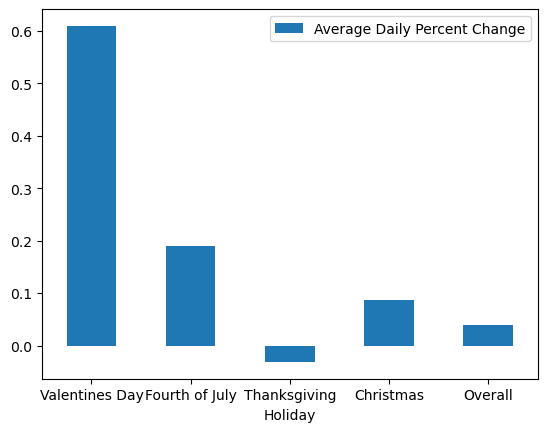

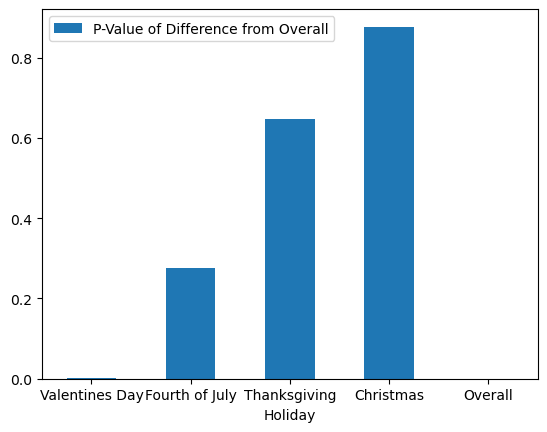

In [134]:
sp_summary = pd.DataFrame({'Holiday': ['Valentines Day', 'Fourth of July', 'Thanksgiving', 'Christmas', 'Overall'], 
              'Average Daily Percent Change': [ave_spva, ave_spfj, ave_spth, ave_spch, ave_spoverall], 'P-Value of Difference from Overall':[pvalue_spva, pvalue_spfj, pvalue_spth, pvalue_spch, None]})

ax = sp_summary.plot.bar(x='Holiday', y='Average Daily Percent Change', rot=0)
ax = sp_summary.plot.bar(x='Holiday', y='P-Value of Difference from Overall', rot=0)

sp_summary